In [ ]:
import numpy as np

def initialize_membership_matrix(n, c):
    U = np.random.rand(n, c)
    U = U / U.sum(axis=1, keepdims=True)
    return U


def update_centroids(X, U, m):
    um = U ** m
    centroids = um.T.dot(X) / um.sum(axis=0)[:, None]
    return centroids

def update_membership_matrix(X, centroids, m):
    n = X.shape[0]
    c = centroids.shape[0]
    U = np.zeros((n, c))
    for i in range(n):
        for j in range(c):
            denominator_sum = 0
            for k in range(c):
                denominator_sum += (np.linalg.norm(X[i] - centroids[j]) / np.linalg.norm(X[i] - centroids[k])) ** (2 / (m - 1))
            U[i, j] = 1 / denominator_sum
    return U

def fuzzy_kmeans(X, c, m, max_iter=100, tol=1e-5):
    n, d = X.shape
    U = initialize_membership_matrix(n, c)
    for iteration in range(max_iter):
        U_old = U.copy()
        centroids = update_centroids(X, U, m)
        U = update_membership_matrix(X, centroids, m)
        if np.linalg.norm(U - U_old) < tol:
            break
    return centroids, U

# Example usage
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 data points with 2 features
c = 3  # Number of clusters
m = 2  # Fuzziness parameter

centroids, U = fuzzy_kmeans(X, c, m)
print("Centroids:\n", centroids)
print("Membership Matrix:\n", U)

In [3]:
pip install scikit-fuzzy


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/994.0 kB ? eta -:--:--
     - ------------------------------------- 41.0/994.0 kB 1.9 MB/s eta 0:00:01
     - ------------------------------------- 41.0/994.0 kB 1.9 MB/s eta 0:00:01
     -- ---------------------------------- 71.7/994.0 kB 653.6 kB/s eta 0:00:02
     --- --------------------------------- 92.2/994.0 kB 655.4 kB/s eta 0:00:02
     ----- ------------------------------ 143.4/994.0 kB 655.8 kB/s eta 0:00:02
     ------ ----------------------------- 174.1/994.0 kB 615.9 kB/s eta 0:00:02
     ------ ----------------------------- 174.1/994.0 kB 615.9 kB/s eta 0:00:02
     ------- ---------------------------- 194.6/994.0 kB 535.8 kB/s eta 0:00:02
     ------- ---------------------------- 204.8/994.0 kB 479.2 kB/s eta 0:00:02
     --------- -------------------------- 256.0/994.0 kB 561.1 kB/s eta 0:00:02
     ---------- ------------------------- 286.7/994.0 kB 553.0 kB/s eta 0:00:02
     ------------ ----------------------- 337.

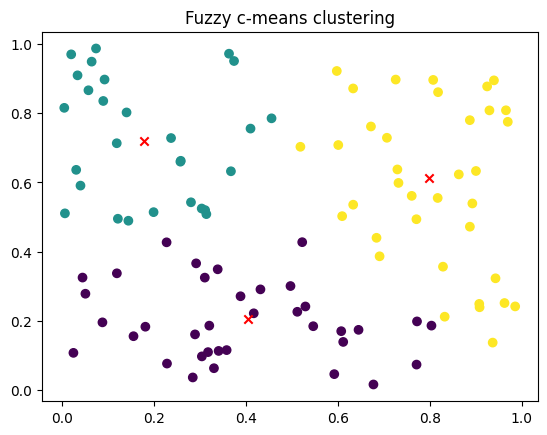

Centroids:
 [[0.40570255 0.20560217]
 [0.17838805 0.71920952]
 [0.79775305 0.61194876]]
Membership Matrix:
 [[0.1119421  0.01672453 0.7642125  0.05761203 0.11503851 0.09664067
  0.41698334 0.78976968 0.28272792 0.93782173 0.78661493 0.71201347
  0.13403129 0.21656979 0.79192218 0.78854357 0.08183828 0.08186619
  0.91121147 0.2210228  0.22580771 0.07648761 0.0390733  0.30157578
  0.88417695 0.07429721 0.10165942 0.13196241 0.66387529 0.48612494
  0.96607126 0.22635765 0.21855497 0.01876193 0.09241945 0.50009775
  0.06499032 0.05289124 0.58239678 0.95296221 0.01123416 0.90369965
  0.82812004 0.01756215 0.07973202 0.01010578 0.01517537 0.06139841
  0.53098316 0.63716244 0.07692137 0.33301657 0.32208825 0.12110448
  0.83772347 0.92504192 0.07395618 0.1190566  0.47339577 0.03835037
  0.09624942 0.92767631 0.46647044 0.08323849 0.20586495 0.99728081
  0.54039673 0.23237045 0.15968552 0.11294946 0.29722829 0.8647332
  0.85995    0.23261584 0.55001708 0.33176367 0.24431576 0.29888733
  0.07997

In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generate some test data
np.random.seed(42)
data = np.random.rand(100, 2)

# Set number of clusters
c = 3

# Apply fuzzy c-means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data.T, c, 2, error=0.005, maxiter=1000, init=None)

# Get the hard clustering for visualization
cluster_labels = np.argmax(u, axis=0)

# Plot the data and cluster centers
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.scatter(cntr[:, 0], cntr[:, 1], c='red', marker='x')
plt.title('Fuzzy c-means clustering')
plt.show()

print("Centroids:\n", cntr)
print("Membership Matrix:\n", u)